In [103]:
import random
import math
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50
birth_rate = 0.02
death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
retirement_age = 65
initial_participation_rate = 0.7 # participation_rate = count 15-64 / total population
initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# assume all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize total population
population = []
senior = []
new_born = []
unemp = []
emp = []

random.seed(1)
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed='0')
    population.append(person)
    senior.append(person) if person.age > 65 else new_born.append(person)
    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed='0')
    population.append(person)
    unemp.append(person)

for human in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed='1')
    emp.append(person)

#print(len(senior)) #135


                


136


In [135]:
# calculate crude death (mortality) rate in U.S based on the data source 
from sympy import symbols, solve

t = symbols('t')
exp = 76*t**77-77*t**76+1-76.4*(1-t)
#solve(exp)

In [145]:
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50
'''
assume new born only happens for population after 14 years old 
Birth rate in US as of 2021: 11.0 per 1,000 population
Data source: https://www.cdc.gov/nchs/fastats/births.htm

Assume death only happens after retired. 
In 2021, life expectancy at birth was 76.4 years for the total U.S. population, 
Data source: https://www.cdc.gov/nchs/products/databriefs/db456.\
htm#:~:text=Rates%20increased%2012.1%25%20for%2045,over%20(15%2C210.9%20to%2015%2C743.3).\
&text=Statistically%20significant%20increase%20from%202020%20to%202021%20(p%20%3C%200.05).,-NOTES%3A%20Rates%20are

so the annual death rate x satisfies
x + 2(1-x)x + 3(1-x)**2*x + ... + 76(1-x)**75*x = 76.4

or based on data source from https://en.wikipedia.org/\
wiki/Mortality_rate#:~:text=Mortality%20rate%20is%20typically%20expressed,0.95%25%20out%20of%20the%20total.

As of 2020, the CIA estimates the U.S. crude death rate will be 8.3 per 1,000
'''
birth_rate = 0.011 # assume new born only happens for population after 14 years old 
death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
retirement_age = 65
initial_participation_rate = 0.7 # participation_rate = count 15-64 / total population
initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

'''
As of 2006, the monthly job finding rate takes 0.563 
Data Source: https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr298.pdf

monthly job separation rate takes 0.47 
Data source: https://builtin.com/recruiting/employee-turnover-statistics#\
:~:text=1.,all%20turnover%20%E2%80%94%20voluntary%20and%20involuntary.
'''
job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# assume all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize total population
population = []
dependent = []
senior = []
new_born = []
unemp = []
emp = []

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed='0')
    senior.append(person) if person.age >= 65 else new_born.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed='0')
    unemp.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed='1')
    emp.append(person)

workforce = list(itertools.chain(unemp,emp))

#print('initial senior: ', len(senior))    
#len(senior)=136; len(new_born)=164; len(unemp)=35; len(emp)=665
#print('initial population:', len(dependent)+len(unemp)+len(emp))

len_senior = [len(senior)]
len_newborn = [len(new_born)]
len_pop =[len(senior)+len(new_born)+len(workforce)]

population = list(itertools.chain(senior, new_born, unemp, emp))

# Simulation loop
for year in range(1, simulation_years):
    
    for person in population:
        # person at age of 15 transit from new_born to workforce next year
        # person at the age of 65 retires and leave workforce automatically   
      
        person.update_age()
        if person.age == 15:
            unemp.append(person)
            

        if person.age > 64:
            senior.append(person)
                  
print(len(unemp))


183


In [138]:
            if person.age == 14:
            new_born.remove(person)
        
        if person.age == 64:
            random_element1 = random.choice(unemp)
            unemp.remove(random_element1)
            
            random_element2 = random.choice(emp)
            emp.remove(random_element2)
    
    # death population each year
    for _ in range(math.ceil(float(len(senior))*death_rate)):
        random_element = random.choice(senior)
        senior.remove(random_element)

    for person in senior:
        if person.age > 80:
            senior.remove(person)
            
    len_senior.append(len(senior))
    
    # new born population each year
    for i in range(math.ceil(float(len(workforce)+len(senior))*birth_rate)):
        person = Person(age=0, employed='0')
        new_born.append(person)
    
    len_newborn.append(len(new_born))
    
    # population transit from unemployed to employed each year
    for i in range(math.ceil(float(len(unemp))*job_finding_rate)):
        random_element = random.choice(unemp)
        unemp.remove(random_element)
        #print(random_element.employed)
        emp.append(random_element)
    
    #len_newborn.append(len(new_born))
    
    dependent =list(itertools.chain(senior,new_born))
    
    population = list(itertools.chain(dependent,unemp,emp))
    len_pop.append(len(population))
    

0

In [ ]:
'''
Assumption 1: only population 15 years and over reproduce 
Birth rate in US as of 2021: 11.0 per 1,000 population
Data source: https://www.cdc.gov/nchs/fastats/births.htm

Assumption 2: death only happens after retired. 
In 2021, life expectancy at birth was 76.4 years for the total U.S. population, 
Data source: https://www.cdc.gov/nchs/products/databriefs/db456.\
htm#:~:text=Rates%20increased%2012.1%25%20for%2045,over%20(15%2C210.9%20to%2015%2C743.3).\
&text=Statistically%20significant%20increase%20from%202020%20to%202021%20(p%20%3C%200.05).,-NOTES%3A%20Rates%20are

so the annual death rate x satisfies
x + 2(1-x)x + 3(1-x)**2*x + ... + 76(1-x)**75*x = 76.4

or based on data source from https://en.wikipedia.org/\
wiki/Mortality_rate#:~:text=Mortality%20rate%20is%20typically%20expressed,0.95%25%20out%20of%20the%20total.

As of 2020, the CIA estimates the U.S. crude death rate will be 8.3 per 1,000

As of 2006, the monthly job finding rate takes 0.563 
Data Source: https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr298.pdf

monthly job separation rate takes 0.47 
Data source: https://builtin.com/recruiting/employee-turnover-statistics#\
:~:text=1.,all%20turnover%20%E2%80%94%20voluntary%20and%20involuntary.

'''

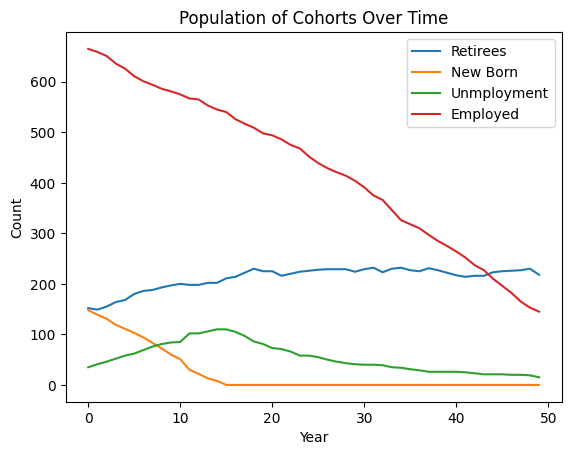

In [92]:
# Version 0629
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population = []
dependent = []
senior = []
new_born = []
unemp = []
emp = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior.append(person) if person.age >= 65 else new_born.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp.append(person)

workforce = list(itertools.chain(unemp,emp))
population = list(itertools.chain(senior, new_born, unemp, emp))

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]
#print('retirees, newborn, unemp, emp: ', [len(senior), len(new_born), len(unemp), len(emp)])

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior)], [len(new_born)], [len(unemp)], [len(emp)]
n = simulation_years
for year in range(1, n):
    new_population = []
    
    newborn_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    for person in population:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        
        if person.is_newborn():
            newborn_this_year += 1
            
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if person.is_employed():
            new_employment += 1
        
    #cohorts = [retired.append(mylist[0]), newborn.append(mylist[1]),unemployed.append(mylist[2]), \
    #           employment.append(mylist[3])]
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    
    my_list = [retired_this_year, newborn_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
years = list(range(simulation_years))
plt.plot(years, cohorts[0], label="Retirees")
plt.plot(years, cohorts[1], label="New Born")
plt.plot(years, cohorts[2], label="Unmployment")
plt.plot(years, cohorts[3], label="Employed")
plt.title("Population of Cohorts Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

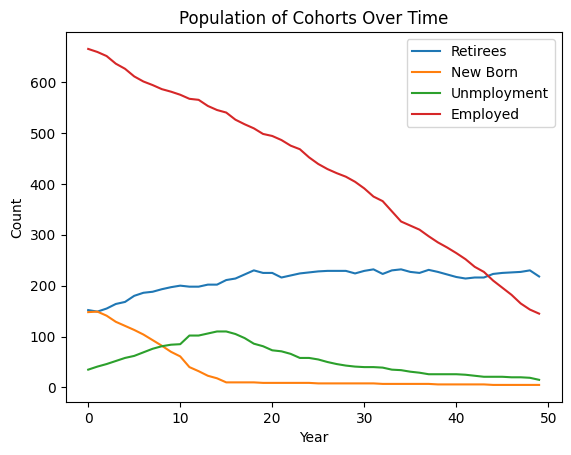

In [160]:
# The most updated version 

import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population = []
dependent = []
senior = []
young = []
unemp = []
emp = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior.append(person) if person.age >= 65 else young.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp.append(person)

workforce = list(itertools.chain(unemp,emp))
population = list(itertools.chain(senior, young, unemp, emp))

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior)], [len(young)], [len(unemp)], [len(emp)]
n = simulation_years #- 40
for year in range(1, n):
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    for person in population:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        
        if person.is_young():
            young_this_year += 1
            
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
        
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    young_this_year += math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
#print('retirees, young, unemp, emp: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])
years = list(range(simulation_years))
plt.plot(years, cohorts[0], label="Retirees")
plt.plot(years, cohorts[1], label="New Born")
plt.plot(years, cohorts[2], label="Unmployment")
plt.plot(years, cohorts[3], label="Employed")
plt.title("Population of Cohorts Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()


In [107]:
#debug 1

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior)], [len(young)], [len(unemp)], [len(emp)]
n = simulation_years #- 40
for year in range(1, n):
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    for person in population:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        
        if person.is_young():
            young_this_year += 1
        
        count_15 = 0
        if person.age == 15:
            count_15 += 1
        
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
        
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    young_this_year += math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    
    new_employment += count_15
    
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
print('retirees, young, unemp, emp: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])

retirees, young, unemp, emp:  [[152, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [148, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [665, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [159]:
# debug 2
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population = []
dependent = []
senior = []
young = []
unemp = []
emp = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior.append(person) if person.age >= 65 else young.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp.append(person)

workforce = list(itertools.chain(unemp,emp))
population = list(itertools.chain(senior, young, unemp, emp))

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]

'''
count_14 = 0
for human in young:
    if human.age == 14:
        count_14 += 1
    #print(human.age)
print(count_14)

'''

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior)], [len(young)], [len(unemp)], [len(emp)]

n = simulation_years #- 40
for year in range(1, n):
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    count_14 = 0
    
    for person in population:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        

    for person in senior:
        if person.age > 80:
            senior.remove(person)
        
        if person.is_young():
            young_this_year += 1
        
        if person.age == 14:
            count_14 += 1
                     
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
            
    #print('The {} th year of age 14: {}'.format(year, count_14))
    #print('young before adding newborn: ', young_this_year)
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    
    newborn = math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    #print('new born: ', newborn)
    young_this_year += newborn
    #print('young after adding newborn: ', young_this_year)
    for i in range(newborn):
        person = Person(age=0, employed=False)
        young.append(person)
    
    
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]

cohorts[1]

[148,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [149]:
# debug 2-1
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population = []
dependent = []
senior = []
young = []
unemp = []
emp = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior.append(person) if person.age >= 65 else young.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp.append(person)

workforce = list(itertools.chain(unemp,emp))
population = list(itertools.chain(senior, young, unemp, emp))

print('senior, young, unemp, emp: ', [len(senior), len(young),len(unemp),len(emp)])

senior, young, unemp, emp:  [152, 148, 35, 665]


In [150]:
# debug 2-2

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]

class change( ):
    def __init__(self, group, change_rate):
        self.group = group
        self.change_rate = change_rate
        
    # delete population from the group each year
    def del_pop():
        for _ in range(math.ceil(float(len(group))*change_rate)):
            random_element = random.choice(group)
            group.remove(random_element)
            
    # adding population to the group each year        
    def add_pop():
        for _ in range(math.ceil(float(len(group))*change_rate)):
            random_element = random.choice(group)
            group.append(random_element)

# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior)], [len(young)], [len(unemp)], [len(emp)]
n = simulation_years #- 40
for year in range(1, n):
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    for person in population:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
        
        if person.is_young():
            young_this_year += 1
            
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
        
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    young_this_year += math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
print('retirees, young, unemp, emp: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])

retirees, young, unemp, emp:  [[152, 149, 155, 164, 168, 180, 186, 188, 193, 197, 200, 198, 198, 202, 202, 211, 214, 222, 230, 225, 225, 216, 220, 224, 226, 228, 229, 229, 229, 224, 229, 232, 223, 230, 232, 227, 225, 231, 227, 222, 217, 214, 216, 216, 223, 225, 226, 227, 230, 218], [148, 149, 141, 129, 121, 113, 104, 93, 82, 70, 61, 40, 32, 23, 18, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5], [35, 41, 46, 52, 58, 62, 69, 76, 81, 84, 85, 102, 102, 106, 110, 110, 105, 97, 86, 81, 73, 71, 66, 58, 58, 55, 50, 46, 43, 41, 40, 40, 39, 35, 34, 31, 29, 26, 26, 26, 26, 25, 23, 21, 21, 21, 20, 20, 19, 15], [665, 659, 651, 636, 626, 611, 601, 594, 586, 581, 575, 567, 565, 553, 545, 540, 526, 517, 509, 498, 494, 486, 475, 468, 452, 439, 429, 421, 414, 404, 391, 375, 366, 346, 326, 318, 310, 297, 285, 275, 264, 252, 237, 227, 210, 196, 182, 165, 153, 145]]


In [154]:
# debug 3
import random
import math
import itertools # join multiple lists
import matplotlib.pyplot as plt

# Parameters
initial_population = 1000
simulation_years = 50

birth_rate = 0.011 # assume only population 15 years and over reproduce 

death_rate = 0.01 # assume death only happens after retired with count_death = count_senior * death_rate
death_age = 80 #a simple alternative way for the senior is assume they die after 80 years old
retirement_age = 65

# Assumption 3: all population aging from 15 to 64 are in labor force and 
# participation_rate = count 15-64 / total population
initial_participation_rate = 0.7 

initial_aging_rate = 0.1 # aging_rate = count 65 and over/ total population
initial_unemployment_rate = 0.05

job_finding_rate = 0.563
job_separation_rate = 0.47

class Person:
    def __init__(self, age, employed):
        self.age = age
        self.employed = employed
    
    def update_age(self):
        self.age += 1
        
    def is_newborn(self):
        return self.age == 0
    
    def is_young(self):
        return self.age < 15
    
    def is_retired(self):
        return self.age >= retirement_age
    
    def is_dead(self):
        return self.age > 80
    
    def is_unemployed(self):
        return not self.employed
    
    def is_employed(self):
        return self.employed

# Initialize workforce data
# Assumption 3: all agents in between 15-64 choose to work, that is, labor force participation is 100%
# then unemployment population + employment population = workforce
initial_workforce = int(initial_population * initial_participation_rate) # 700
initial_senior = int(initial_population * initial_aging_rate) # 100
initial_unemp = int(initial_workforce * initial_unemployment_rate) # 700*0.05=35

# Initialize population
population = []
dependent = []
senior = []
young = []
unemp = []
emp = []
unem_rate = [initial_unemployment_rate]

random.seed(1)
# the cohort of dependent
for human in range(initial_population - initial_workforce):
    person = Person(age=random.randint(*random.choice([(0, 14), (65, 80)])),employed=False)
    senior.append(person) if person.age >= 65 else young.append(person)

# the cohort of unemployment    
for human in range(initial_unemp):
    person = Person(age=random.randint(15, 64), employed=False)
    unemp.append(person)

# the cohort of employment
for _ in range(initial_workforce-initial_unemp):
    person = Person(age=random.randint(15, 64), employed=True)
    emp.append(person)

workforce = list(itertools.chain(unemp,emp))
population = list(itertools.chain(senior, young, unemp, emp))

#print('senior, young, unemp, emp: ', [len(senior), len(young),len(unemp),len(emp)])

# debug 2-2

# initial values: retirees, newborn, unemp, emp:  [152, 148, 35, 665]

class change( ):
    # transition concerning age update from young to adult, from workforce to retired, from retired to death 
    # transition from unemp to emp (job finding rate), from emp to unemp (job separation rate)
    # from retired to death (death rate), from newborn to young (birth rate)
    def __init__(self, group, change_rate):
        self.group = group
        self.change_rate = change_rate
    
    # age related transition
    def group_out(age, group_out):
        num1 = 0
        for person in group_out:
            if person.age == age:
                num1 += 1
                group_out.remove(person)
                
    def group_in(age, group_in):
        num2 = 0
        for person in group_in:
            if person.age == age:
                num2 += 1
                group_in.append(person)
    
    # change_rate related transition
    # delete population from the group each year
    def del_pop():
        for _ in range(math.ceil(float(len(group))*change_rate)):
            random_element = random.choice(group)
            group.remove(random_element)
            
    # adding population to the group each year        
    def add_pop():
        for _ in range(math.ceil(float(len(group))*change_rate)):
            random_element = random.choice(group)
            group.append(random_element)
            
    
# Simulation loop
#cohorts = [retired, newborn, unemployed, employment]
cohorts = [len(senior)], [len(young)], [len(unemp)], [len(emp)]
n = simulation_years - 40
for year in range(1, n):
    new_population = []
    
    young_this_year = 0
    retired_this_year = 0
    unemployed_this_year = 0
    new_employment = 0
    
    for person in population:
        person.update_age()

        if person.is_retired() and not person.is_dead():
            retired_this_year += 1
            person.employed = False
                    
        if person.is_young():
            young_this_year += 1
            
        if 14 < person.age < 65 and person.is_unemployed():
            if random.random() < initial_unemployment_rate:
                person.employed = True
            else:
                unemployed_this_year += 1
                        
        if 14 < person.age < 65 and person.is_employed():
            new_employment += 1
        
    retired_this_year -= math.ceil(retired_this_year * death_rate)
    young_this_year += math.ceil((retired_this_year + unemployed_this_year + new_employment) * birth_rate)
    
    my_list = [retired_this_year, young_this_year, unemployed_this_year, new_employment]
    [cohorts[i].append(my_list[i]) for i in range(len(cohorts))]
    
print('retirees, young, unemp, emp: ', [cohorts[0], cohorts[1], cohorts[2], cohorts[3]])

retirees, young, unemp, emp:  [[152, 149, 155, 164, 168, 180, 186, 188, 193, 197], [148, 149, 141, 129, 121, 113, 104, 93, 82, 70], [35, 41, 46, 52, 58, 62, 69, 76, 81, 84], [665, 659, 651, 636, 626, 611, 601, 594, 586, 581]]
